%md #![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png) + ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)

# **Warmup Notebook: Testing Databricks Environment**

*Note: This notebook is merely a warmup exercise and not subject to grading.*

This notebook will show you how to install the test libraries, test basic notebook functionality, and how to export a notebook for submitting. To move through the notebook just run each of the cells. You will not need to solve any problems to complete this lab. You can run a cell by pressing "shift-enter", which will compute the current cell and advance to the next cell, or by clicking in a cell and pressing "control-enter", which will compute the current cell and remain in that cell.

**Within this notebook we will cover:**

- *Part 1*: Testing Spark Functionality
- *Part 2*: Checking Test Helper
- *Part 3*: Checking Matplotlib Support
- *Part 4*: Checking KaTeX Support
- *Part 5*: Exporting Notebook

#### Prelude

**(1a) Installing Test Helper**

The class helper library "test_helper" is published in the PyPI Python Package repository as [test_helper](https://pypi.python.org/pypi/test_helper) package.

You can install the library into your workspace following the following instructions:

<br/>

- **Step 1**: Click on "Workspace", then on the dropdown, and select "Create" and "Library".

<br/>

![locate_library](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/locate_library_small.png)

<br/>

- **Step 2**: Enter the name of the library by selecting "Upload Python Egg or PyPI" and entering "test_helper" in the "PyPI Name" field.

<br/>

![install_library](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/install_library_small.png)

<br/>

- **Step 3**: Make sure the checkbox for auto-attaching the library to your cluster is selected.

<br/>

![enable_attachment](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/enable_attachment_small.png)

**(1b) Uploading Text File**

Now we update to Databricks a text file which will be used in next part. 

- **Step 1**: Download [shakesper.txt](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/shakespere.txt) to your computer.

- **Step 2**: Go to the uploading page by selecting "Data" and then "Add Data".

<br/>

![add_data](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/add_data_small.png)

<br/>

- **Step 3**: Click "browse" to select the file you have just downloaded.

<br/>

![browse_file](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/browse_file_small.png)

#### **Part 1: Testing Spark functionality**

**(1a) Common Operators**

In [5]:
# check whether Spark is working properly
largeRange = sc.parallelize(xrange(100000))
reduceTest = largeRange.reduce(lambda a, b: a + b)
filterReduceTest = largeRange.filter(lambda x: x % 7 == 0).sum()

print reduceTest
print filterReduceTest

# AssertionError will be raised if Spark is malfunctioning
assert reduceTest == 4999950000
assert filterReduceTest == 714264285

4999950000
714264285

**(1b) Loading Text File**

In [7]:
# load text file with sc.textFile
import os.path
filePath = 'dbfs:/FileStore/tables/shakespere.txt'

rawData = sc.textFile(filePath)
shakespeareCount = rawData.count()

print shakespeareCount

assert shakespeareCount == 149689

149689

#### ** Part 2: Checking Test Helper **

** (2a) Hash Comparison **

In [9]:
# Check our testing library/package
# This should print '1 test passed.' on two lines
from test_helper import Test

twelve = 12
Test.assertEquals(twelve, 12, 'twelve should equal 12')
Test.assertEqualsHashed(twelve, '7b52009b64fd0a2a49e6d8a939753077792b0554',
                        'twelve, once hashed, should equal the hashed value of 12')

1 test passed.
1 test passed.

**(2b) List Comparison**

In [11]:
# This should print '1 test passed.'
unsortedList = [(5, 'b'), (5, 'a'), (4, 'c'), (3, 'a')]
Test.assertEquals(sorted(unsortedList), [(3, 'a'), (4, 'c'), (5, 'a'), (5, 'b')],
                  'unsortedList does not sort properly')

1 test passed.

#### ** Part 3: Checking Matplotlib Support **

** (3a) Our first plot **

After executing the code cell below, you should see a plot with 50 blue circles.  The circles should start at the bottom left and end at the top right.

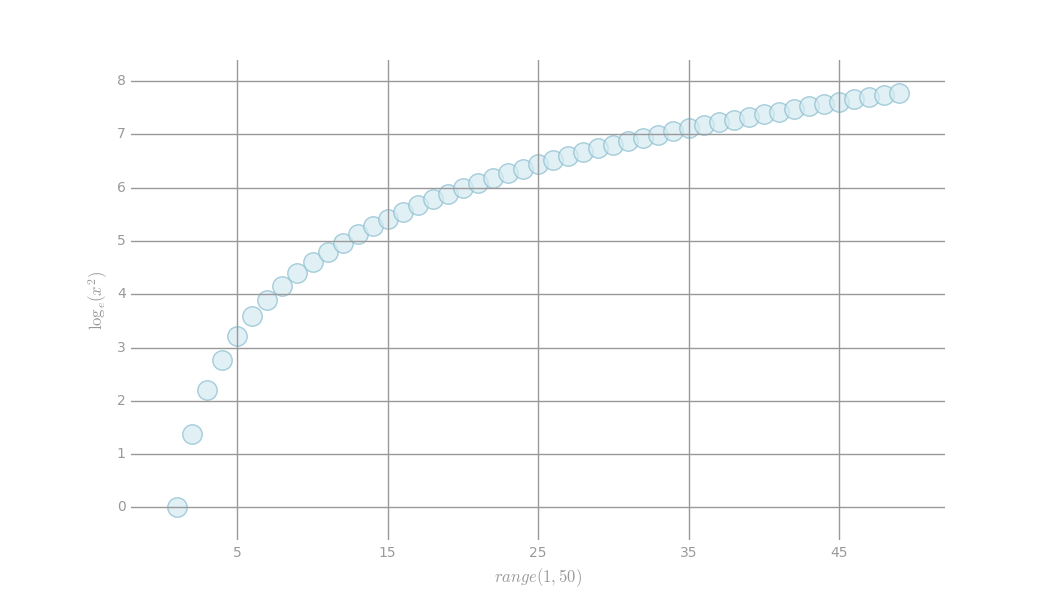

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import log

# function for generating plot layout
def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999', gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot data
x = range(1, 50)
y = [log(x1 ** 2) for x1 in x]
fig, ax = preparePlot(range(5, 60, 10), range(0, 12, 1))
plt.scatter(x, y, s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
ax.set_xlabel(r'$range(1, 50)$'), ax.set_ylabel(r'$\log_e(x^2)$')

# call display() to show the figure
display(fig)

#### ** Part 4: Checking KaTeX Support **

Databricks notebooks render LaTeX formulae with [KaTeX](https://katex.org/). [Here](https://katex.org/docs/supported.html) is a list of all supported symbols and macros.

**Tip**: The common newline `\\` in LaTeX is not allowed here, so you have to use `\cr` instead.

** (4a) Gradient descent formula **

You should see a formula on the line below this one: $$ \small \mathbf{w}_{i+1} = \mathbf{w}_i - \alpha_i \sum_j (\mathbf{w}_i^\top\mathbf{x}_j  - y_j) \mathbf{x}_j \,.$$
 
This formula is included inline with the text and is \\( \small (\mathbf{w}^\top \mathbf{x} - y) \mathbf{x} \\).

** (4b) Log loss formula **

This formula shows log loss for single point. Log loss is defined as: 
$$ 
\small
loss(p, y) = \begin{cases}
   -\log(p)   & \text{if } y = 1 \cr
   -\log(1-p) & \text{if } y = 0
\end{cases} 
$$

#### ** Part 5: Exporting Notebook**

The export and download the notebook from Databricks, click on "File", then select "Export" and "Source File". This will export your notebook as a .py file to your computer.

<br/>

![export_notebook](https://raw.githubusercontent.com/hkust-comp4651-2018f/assets/master/assignment-4/export_notebook_small.png)

<br/>

When you've done coding, you can add the exported .py file to the git repo, commit and push it to GitHub for grading.